In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
train_dir = "../train" #passing the path with training images
test_dir = "../test"   #passing the path with testing images

In [3]:
img_size = 48

In [4]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)



train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                                                         )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [6]:
class_names = train_generator.class_indices

class_names_swap = {v: k for k, v in class_names.items()}
print(class_names_swap)

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [7]:
from sklearn.utils import class_weight 
import numpy as np

class_weights = class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(train_generator.classes), 
            y = train_generator.classes)

train_class_weights = dict(enumerate(class_weights))
# model.fit_generator(..., class_weight=train_class_weights)

In [8]:
train_class_weights

{0: 1.0266404434114071,
 1: 9.401555464592715,
 2: 1.0009587727708533,
 3: 0.5684585684585685,
 4: 0.826068191627104,
 5: 0.8491570541259982,
 6: 1.2933160650937552}

In [9]:
class_names_swap

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

In [20]:

model = tf.keras.applications.EfficientNetB5(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(48, 48, 1),
    pooling=None,
    classes=7,
    classifier_activation="softmax"
)

In [21]:
epochs = 200
batch_size = 64
model.summary()

Model: "efficientnetb5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 rescaling_2 (Rescaling)        (None, 48, 48, 1)    0           ['input_3[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 48, 48, 1)   3           ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 49, 49, 1)    0           ['normalization_2[0]

                                                                                                  
 block1c_se_squeeze (GlobalAver  (None, 24)          0           ['block1c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block1c_se_reshape (Reshape)   (None, 1, 1, 24)     0           ['block1c_se_squeeze[0][0]']     
                                                                                                  
 block1c_se_reduce (Conv2D)     (None, 1, 1, 6)      150         ['block1c_se_reshape[0][0]']     
                                                                                                  
 block1c_se_expand (Conv2D)     (None, 1, 1, 24)     168         ['block1c_se_reduce[0][0]']      
                                                                                                  
 block1c_s

                                                                                                  
 block2b_se_expand (Conv2D)     (None, 1, 1, 240)    2640        ['block2b_se_reduce[0][0]']      
                                                                                                  
 block2b_se_excite (Multiply)   (None, 12, 12, 240)  0           ['block2b_activation[0][0]',     
                                                                  'block2b_se_expand[0][0]']      
                                                                                                  
 block2b_project_conv (Conv2D)  (None, 12, 12, 40)   9600        ['block2b_se_excite[0][0]']      
                                                                                                  
 block2b_project_bn (BatchNorma  (None, 12, 12, 40)  160         ['block2b_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block2d_project_conv (Conv2D)  (None, 12, 12, 40)   9600        ['block2d_se_excite[0][0]']      
                                                                                                  
 block2d_project_bn (BatchNorma  (None, 12, 12, 40)  160         ['block2d_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2d_drop (Dropout)         (None, 12, 12, 40)   0           ['block2d_project_bn[0][0]']     
                                                                                                  
 block2d_add (Add)              (None, 12, 12, 40)   0           ['block2d_drop[0][0]',           
                                                                  'block2c_add[0][0]']            
          

                                                                                                  
 block3a_project_bn (BatchNorma  (None, 6, 6, 64)    256         ['block3a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, 6, 6, 384)    24576       ['block3a_project_bn[0][0]']     
                                                                                                  
 block3b_expand_bn (BatchNormal  (None, 6, 6, 384)   1536        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 6, 6, 384)   0           ['block3b_expand_bn[0][0]']      
 ivation) 

                                                                                                  
 block3d_expand_bn (BatchNormal  (None, 6, 6, 384)   1536        ['block3d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3d_expand_activation (Act  (None, 6, 6, 384)   0           ['block3d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3d_dwconv (DepthwiseConv2  (None, 6, 6, 384)   9600        ['block3d_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3d_b

 ivation)                                                                                         
                                                                                                  
 block4a_dwconv_pad (ZeroPaddin  (None, 7, 7, 384)   0           ['block4a_expand_activation[0][0]
 g2D)                                                            ']                               
                                                                                                  
 block4a_dwconv (DepthwiseConv2  (None, 3, 3, 384)   3456        ['block4a_dwconv_pad[0][0]']     
 D)                                                                                               
                                                                                                  
 block4a_bn (BatchNormalization  (None, 3, 3, 384)   1536        ['block4a_dwconv[0][0]']         
 )                                                                                                
          

                                                                                                  
 block4c_activation (Activation  (None, 3, 3, 768)   0           ['block4c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4c_se_squeeze (GlobalAver  (None, 768)         0           ['block4c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4c_se_reshape (Reshape)   (None, 1, 1, 768)    0           ['block4c_se_squeeze[0][0]']     
                                                                                                  
 block4c_se_reduce (Conv2D)     (None, 1, 1, 32)     24608       ['block4c_se_reshape[0][0]']     
          

 agePooling2D)                                                                                    
                                                                                                  
 block4e_se_reshape (Reshape)   (None, 1, 1, 768)    0           ['block4e_se_squeeze[0][0]']     
                                                                                                  
 block4e_se_reduce (Conv2D)     (None, 1, 1, 32)     24608       ['block4e_se_reshape[0][0]']     
                                                                                                  
 block4e_se_expand (Conv2D)     (None, 1, 1, 768)    25344       ['block4e_se_reduce[0][0]']      
                                                                                                  
 block4e_se_excite (Multiply)   (None, 3, 3, 768)    0           ['block4e_activation[0][0]',     
                                                                  'block4e_se_expand[0][0]']      
          

                                                                                                  
 block4g_se_expand (Conv2D)     (None, 1, 1, 768)    25344       ['block4g_se_reduce[0][0]']      
                                                                                                  
 block4g_se_excite (Multiply)   (None, 3, 3, 768)    0           ['block4g_activation[0][0]',     
                                                                  'block4g_se_expand[0][0]']      
                                                                                                  
 block4g_project_conv (Conv2D)  (None, 3, 3, 128)    98304       ['block4g_se_excite[0][0]']      
                                                                                                  
 block4g_project_bn (BatchNorma  (None, 3, 3, 128)   512         ['block4g_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block5b_drop (Dropout)         (None, 3, 3, 176)    0           ['block5b_project_bn[0][0]']     
                                                                                                  
 block5b_add (Add)              (None, 3, 3, 176)    0           ['block5b_drop[0][0]',           
                                                                  'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, 3, 3, 1056)   185856      ['block5b_add[0][0]']            
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, 3, 3, 1056)  4224        ['block5c_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block5e_expand_conv (Conv2D)   (None, 3, 3, 1056)   185856      ['block5d_add[0][0]']            
                                                                                                  
 block5e_expand_bn (BatchNormal  (None, 3, 3, 1056)  4224        ['block5e_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5e_expand_activation (Act  (None, 3, 3, 1056)  0           ['block5e_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5e_dwconv (DepthwiseConv2  (None, 3, 3, 1056)  26400       ['block5e_expand_activation[0][0]
 D)       

                                                                                                  
 block5g_expand_activation (Act  (None, 3, 3, 1056)  0           ['block5g_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5g_dwconv (DepthwiseConv2  (None, 3, 3, 1056)  26400       ['block5g_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block5g_bn (BatchNormalization  (None, 3, 3, 1056)  4224        ['block5g_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block5g_a

 block6b_bn (BatchNormalization  (None, 2, 2, 1824)  7296        ['block6b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block6b_activation (Activation  (None, 2, 2, 1824)  0           ['block6b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6b_se_squeeze (GlobalAver  (None, 1824)        0           ['block6b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6b_se_reshape (Reshape)   (None, 1, 1, 1824)   0           ['block6b_se_squeeze[0][0]']     
          

                                                                                                  
 block6d_se_squeeze (GlobalAver  (None, 1824)        0           ['block6d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6d_se_reshape (Reshape)   (None, 1, 1, 1824)   0           ['block6d_se_squeeze[0][0]']     
                                                                                                  
 block6d_se_reduce (Conv2D)     (None, 1, 1, 76)     138700      ['block6d_se_reshape[0][0]']     
                                                                                                  
 block6d_se_expand (Conv2D)     (None, 1, 1, 1824)   140448      ['block6d_se_reduce[0][0]']      
                                                                                                  
 block6d_s

                                                                                                  
 block6f_se_reduce (Conv2D)     (None, 1, 1, 76)     138700      ['block6f_se_reshape[0][0]']     
                                                                                                  
 block6f_se_expand (Conv2D)     (None, 1, 1, 1824)   140448      ['block6f_se_reduce[0][0]']      
                                                                                                  
 block6f_se_excite (Multiply)   (None, 2, 2, 1824)   0           ['block6f_activation[0][0]',     
                                                                  'block6f_se_expand[0][0]']      
                                                                                                  
 block6f_project_conv (Conv2D)  (None, 2, 2, 304)    554496      ['block6f_se_excite[0][0]']      
                                                                                                  
 block6f_p

 block6h_se_excite (Multiply)   (None, 2, 2, 1824)   0           ['block6h_activation[0][0]',     
                                                                  'block6h_se_expand[0][0]']      
                                                                                                  
 block6h_project_conv (Conv2D)  (None, 2, 2, 304)    554496      ['block6h_se_excite[0][0]']      
                                                                                                  
 block6h_project_bn (BatchNorma  (None, 2, 2, 304)   1216        ['block6h_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6h_drop (Dropout)         (None, 2, 2, 304)    0           ['block6h_project_bn[0][0]']     
                                                                                                  
 block6h_a

 block7a_project_bn (BatchNorma  (None, 2, 2, 512)   2048        ['block7a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block7b_expand_conv (Conv2D)   (None, 2, 2, 3072)   1572864     ['block7a_project_bn[0][0]']     
                                                                                                  
 block7b_expand_bn (BatchNormal  (None, 2, 2, 3072)  12288       ['block7b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7b_expand_activation (Act  (None, 2, 2, 3072)  0           ['block7b_expand_bn[0][0]']      
 ivation)                                                                                         
          

 top_bn (BatchNormalization)    (None, 2, 2, 2048)   8192        ['top_conv[0][0]']               
                                                                                                  
 top_activation (Activation)    (None, 2, 2, 2048)   0           ['top_bn[0][0]']                 
                                                                                                  
 avg_pool (GlobalAveragePooling  (None, 2048)        0           ['top_activation[0][0]']         
 2D)                                                                                              
                                                                                                  
 top_dropout (Dropout)          (None, 2048)         0           ['avg_pool[0][0]']               
                                                                                                  
 predictions (Dense)            (None, 7)            14343       ['top_dropout[0][0]']            
          

In [22]:
learning_rate = 0.001
decay_rate = learning_rate / 25
# momentum = 0.8
opt = Adam(lr=learning_rate,  decay=decay_rate)


model.compile(
    optimizer = opt, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    'fer-52.h5', 
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    save_weights_only=False,
    mode='auto'
)

In [24]:
import scipy.integrate

import scipy.special
import scipy

history = model.fit(x = train_generator,epochs = epochs,batch_size=batch_size,validation_data = validation_generator,callbacks=[checkpoint])

Epoch 1/200
359/359 [==============================] - ETA: 0s - loss: 3.1794 - accuracy: 0.1973
Epoch 1: val_accuracy improved from -inf to 0.24721, saving model to fer-52.h5
359/359 [==============================] - 419s 1s/step - loss: 3.1794 - accuracy: 0.1973 - val_loss: 1.8399 - val_accuracy: 0.2472
Epoch 2/200
359/359 [==============================] - ETA: 0s - loss: 2.4427 - accuracy: 0.2261
Epoch 2: val_accuracy did not improve from 0.24721
359/359 [==============================] - 383s 1s/step - loss: 2.4427 - accuracy: 0.2261 - val_loss: 1.8171 - val_accuracy: 0.2472
Epoch 3/200
359/359 [==============================] - ETA: 0s - loss: 2.2590 - accuracy: 0.2409
Epoch 3: val_accuracy improved from 0.24721 to 0.24791, saving model to fer-52.h5
359/359 [==============================] - 400s 1s/step - loss: 2.2590 - accuracy: 0.2409 - val_loss: 1.8446 - val_accuracy: 0.2479
Epoch 4/200
359/359 [==============================] - ETA: 0s - loss: 2.2116 - accuracy: 0.2385
Epoc

Epoch 30/200
359/359 [==============================] - ETA: 0s - loss: 1.8104 - accuracy: 0.2470
Epoch 30: val_accuracy did not improve from 0.25628
359/359 [==============================] - 383s 1s/step - loss: 1.8104 - accuracy: 0.2470 - val_loss: 1.8010 - val_accuracy: 0.2472
Epoch 31/200
359/359 [==============================] - ETA: 0s - loss: 1.8081 - accuracy: 0.2496
Epoch 31: val_accuracy did not improve from 0.25628
359/359 [==============================] - 383s 1s/step - loss: 1.8081 - accuracy: 0.2496 - val_loss: 1.7989 - val_accuracy: 0.2472
Epoch 32/200
359/359 [==============================] - ETA: 0s - loss: 1.8043 - accuracy: 0.2473
Epoch 32: val_accuracy did not improve from 0.25628
359/359 [==============================] - 383s 1s/step - loss: 1.8043 - accuracy: 0.2473 - val_loss: 1.8044 - val_accuracy: 0.2472
Epoch 33/200
359/359 [==============================] - ETA: 0s - loss: 1.8085 - accuracy: 0.2483
Epoch 33: val_accuracy did not improve from 0.25628
359/

Epoch 59/200
359/359 [==============================] - ETA: 0s - loss: 1.7484 - accuracy: 0.2869
Epoch 59: val_accuracy improved from 0.28561 to 0.31983, saving model to fer-52.h5
359/359 [==============================] - 389s 1s/step - loss: 1.7484 - accuracy: 0.2869 - val_loss: 1.7181 - val_accuracy: 0.3198
Epoch 60/200
359/359 [==============================] - ETA: 0s - loss: 1.7314 - accuracy: 0.2964
Epoch 60: val_accuracy did not improve from 0.31983
359/359 [==============================] - 380s 1s/step - loss: 1.7314 - accuracy: 0.2964 - val_loss: 1.7053 - val_accuracy: 0.3122
Epoch 61/200
359/359 [==============================] - ETA: 0s - loss: 1.7551 - accuracy: 0.2790
Epoch 61: val_accuracy did not improve from 0.31983
359/359 [==============================] - 383s 1s/step - loss: 1.7551 - accuracy: 0.2790 - val_loss: 1.7161 - val_accuracy: 0.2968
Epoch 62/200
359/359 [==============================] - ETA: 0s - loss: 1.7320 - accuracy: 0.2927
Epoch 62: val_accuracy im

359/359 [==============================] - 413s 1s/step - loss: 1.3987 - accuracy: 0.4542 - val_loss: 1.3616 - val_accuracy: 0.4574
Epoch 87/200
359/359 [==============================] - ETA: 0s - loss: 1.3878 - accuracy: 0.4597
Epoch 87: val_accuracy improved from 0.46229 to 0.46927, saving model to fer-52.h5
359/359 [==============================] - 410s 1s/step - loss: 1.3878 - accuracy: 0.4597 - val_loss: 1.3346 - val_accuracy: 0.4693
Epoch 88/200
359/359 [==============================] - ETA: 0s - loss: 1.3816 - accuracy: 0.4615
Epoch 88: val_accuracy did not improve from 0.46927
359/359 [==============================] - 396s 1s/step - loss: 1.3816 - accuracy: 0.4615 - val_loss: 1.3836 - val_accuracy: 0.4595
Epoch 89/200
359/359 [==============================] - ETA: 0s - loss: 1.3793 - accuracy: 0.4607
Epoch 89: val_accuracy did not improve from 0.46927
359/359 [==============================] - 396s 1s/step - loss: 1.3793 - accuracy: 0.4607 - val_loss: 1.3377 - val_accuracy

359/359 [==============================] - ETA: 0s - loss: 1.1641 - accuracy: 0.5536
Epoch 114: val_accuracy did not improve from 0.55796
359/359 [==============================] - 385s 1s/step - loss: 1.1641 - accuracy: 0.5536 - val_loss: 1.1678 - val_accuracy: 0.5503
Epoch 115/200
359/359 [==============================] - ETA: 0s - loss: 1.1591 - accuracy: 0.5558
Epoch 115: val_accuracy did not improve from 0.55796
359/359 [==============================] - 384s 1s/step - loss: 1.1591 - accuracy: 0.5558 - val_loss: 1.1505 - val_accuracy: 0.5573
Epoch 116/200
359/359 [==============================] - ETA: 0s - loss: 1.1586 - accuracy: 0.5563
Epoch 116: val_accuracy did not improve from 0.55796
359/359 [==============================] - 385s 1s/step - loss: 1.1586 - accuracy: 0.5563 - val_loss: 1.1606 - val_accuracy: 0.5391
Epoch 117/200
359/359 [==============================] - ETA: 0s - loss: 1.1750 - accuracy: 0.5493
Epoch 117: val_accuracy did not improve from 0.55796
359/359 [=

359/359 [==============================] - ETA: 0s - loss: 1.1075 - accuracy: 0.5762
Epoch 142: val_accuracy did not improve from 0.58939
359/359 [==============================] - 385s 1s/step - loss: 1.1075 - accuracy: 0.5762 - val_loss: 1.1046 - val_accuracy: 0.5866
Epoch 143/200
359/359 [==============================] - ETA: 0s - loss: 1.0952 - accuracy: 0.5857
Epoch 143: val_accuracy improved from 0.58939 to 0.59567, saving model to fer-52.h5
359/359 [==============================] - 394s 1s/step - loss: 1.0952 - accuracy: 0.5857 - val_loss: 1.0954 - val_accuracy: 0.5957
Epoch 144/200
359/359 [==============================] - ETA: 0s - loss: 1.0811 - accuracy: 0.5866
Epoch 144: val_accuracy did not improve from 0.59567
359/359 [==============================] - 389s 1s/step - loss: 1.0811 - accuracy: 0.5866 - val_loss: 1.2148 - val_accuracy: 0.5426
Epoch 145/200
359/359 [==============================] - ETA: 0s - loss: 1.1376 - accuracy: 0.5665
Epoch 145: val_accuracy did not 

359/359 [==============================] - 420s 1s/step - loss: 0.9655 - accuracy: 0.6363 - val_loss: 1.0453 - val_accuracy: 0.6215
Epoch 171/200
359/359 [==============================] - ETA: 0s - loss: 0.9708 - accuracy: 0.6321
Epoch 171: val_accuracy did not improve from 0.62151
359/359 [==============================] - 406s 1s/step - loss: 0.9708 - accuracy: 0.6321 - val_loss: 1.0355 - val_accuracy: 0.6173
Epoch 172/200
359/359 [==============================] - ETA: 0s - loss: 0.9619 - accuracy: 0.6376
Epoch 172: val_accuracy did not improve from 0.62151
359/359 [==============================] - 407s 1s/step - loss: 0.9619 - accuracy: 0.6376 - val_loss: 1.0609 - val_accuracy: 0.6110
Epoch 173/200
359/359 [==============================] - ETA: 0s - loss: 0.9543 - accuracy: 0.6357
Epoch 173: val_accuracy did not improve from 0.62151
359/359 [==============================] - 406s 1s/step - loss: 0.9543 - accuracy: 0.6357 - val_loss: 1.0865 - val_accuracy: 0.6215
Epoch 174/200
35

359/359 [==============================] - ETA: 0s - loss: 0.7490 - accuracy: 0.7199
Epoch 199: val_accuracy did not improve from 0.64176
359/359 [==============================] - 378s 1s/step - loss: 0.7490 - accuracy: 0.7199 - val_loss: 1.1027 - val_accuracy: 0.6278
Epoch 200/200
359/359 [==============================] - ETA: 0s - loss: 0.7360 - accuracy: 0.7264
Epoch 200: val_accuracy did not improve from 0.64176
359/359 [==============================] - 378s 1s/step - loss: 0.7360 - accuracy: 0.7264 - val_loss: 1.1898 - val_accuracy: 0.6208


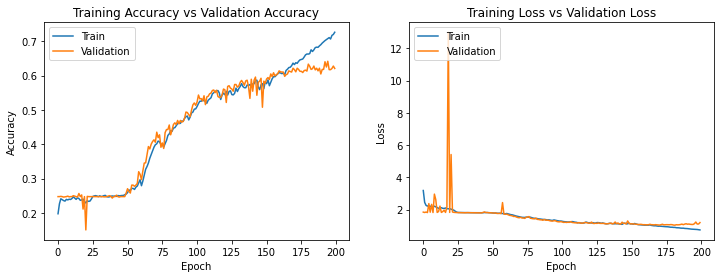

In [25]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [26]:
model.save('deeperdropout52_200_model.h5')
model.save_weights('deeperdropout52_200_weights.h5')

In [27]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 3s 136ms/step - loss: 1.1898 - accuracy: 0.6208
final train accuracy = 75.26 , validation accuracy = 62.08


In [28]:
model = tf.keras.models.load_model('fer-52.h5')

In [29]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 3s 143ms/step - loss: 1.0749 - accuracy: 0.6418
final train accuracy = 74.42 , validation accuracy = 64.18


In [30]:
train_generator.reset()
X_train, y_train = next(train_generator)
for i in range(int(len(train_generator))-1): #1st batch is already fetched before the for loop.
    img, label = next(train_generator)
    X_train = np.append(X_train, img, axis=0 )
    y_train = np.append(y_train, label, axis=0)
print(X_train.shape, y_train.shape)

validation_generator.reset()
X_test, y_test = next(validation_generator)
for i in range(int(len(validation_generator))-1): #1st batch is already fetched before the for loop.
    img, label = next(validation_generator)
    X_test = np.append(X_test, img, axis=0 )
    y_test = np.append(y_test, label, axis=0)
print(X_test.shape, y_test.shape)

(22968, 48, 48, 1) (22968, 7)
(1432, 48, 48, 1) (1432, 7)


In [31]:
ypred = model.predict(X_train)
ypred = ypred.argmax(axis=-1)


ytrain = y_train.argmax(axis=-1)

ypred_test = model.predict(X_test)
ypred_test = ypred_test.argmax(axis=-1)



ytest = y_test.argmax(axis=-1)


45/45 [==============================] - 4s 96ms/step


23/23 [==============================] - 9s 147ms/step
Confusion Matrix
[[27  2 21 48 41 33 19]
 [ 1  0  1  7  7  5  1]
 [29  1 30 44 29 36 35]
 [58  6 34 89 56 72 39]
 [31  5 32 69 39 41 29]
 [36  3 27 55 57 41 30]
 [20  3 14 45 35 34 15]]
Classification Report
              precision    recall  f1-score   support

       angry       0.13      0.14      0.14       191
     disgust       0.00      0.00      0.00        22
        fear       0.19      0.15      0.17       204
       happy       0.25      0.25      0.25       354
     neutral       0.15      0.16      0.15       246
         sad       0.16      0.16      0.16       249
    surprise       0.09      0.09      0.09       166

    accuracy                           0.17      1432
   macro avg       0.14      0.14      0.14      1432
weighted avg       0.17      0.17      0.17      1432



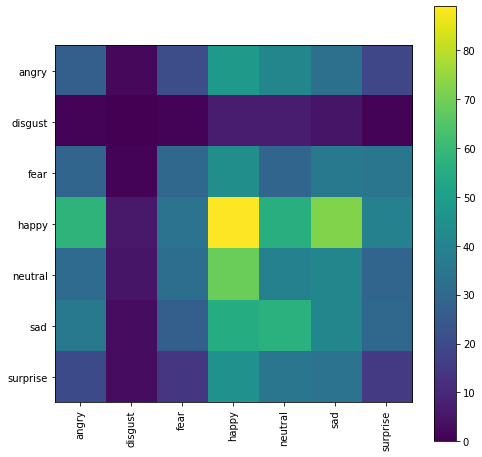

In [32]:
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(validation_generator.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

359/359 [==============================] - 50s 140ms/step
Confusion Matrix
[[ 403   46  310  861  606  609  361]
 [  57    5   40   94   46   73   34]
 [ 420   48  340  832  675  588  375]
 [ 756   90  599 1509 1129 1045  644]
 [ 532   69  440 1017  768  707  439]
 [ 492   57  393 1006  770  734  412]
 [ 344   27  260  669  481  466  290]]
Classification Report
              precision    recall  f1-score   support

       angry       0.13      0.13      0.13      3196
     disgust       0.01      0.01      0.01       349
        fear       0.14      0.10      0.12      3278
       happy       0.25      0.26      0.26      5772
     neutral       0.17      0.19      0.18      3972
         sad       0.17      0.19      0.18      3864
    surprise       0.11      0.11      0.11      2537

    accuracy                           0.18     22968
   macro avg       0.14      0.14      0.14     22968
weighted avg       0.17      0.18      0.17     22968



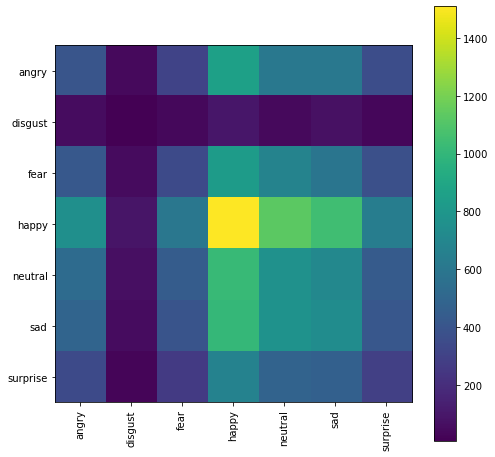

In [33]:
y_pred = model.predict(train_generator)
y_pred = np.argmax(y_pred, axis=1)
class_labels = train_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(train_generator.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(train_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

ROC AUC score: 0.8430929933793976


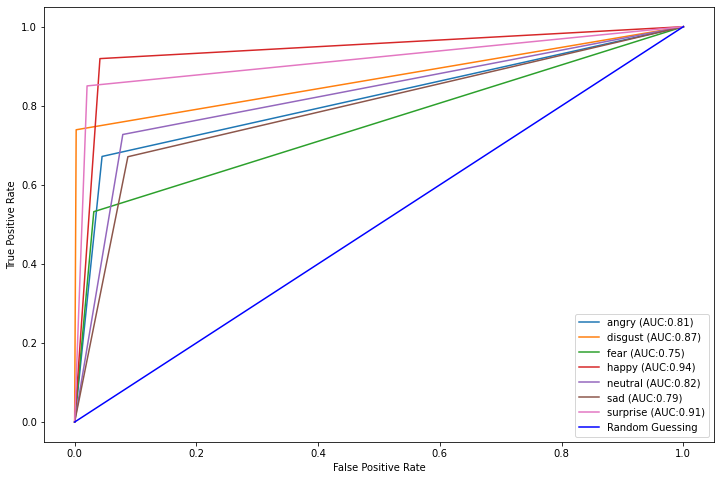

In [34]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['angry', 'disgust', 'fear', 'happy', 'neutral',
          'sad', 'surprise']
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average,multi_class='ovo')


print('ROC AUC score:', multiclass_roc_auc_score(ytrain, ypred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

ROC AUC score: 0.8430929933793976


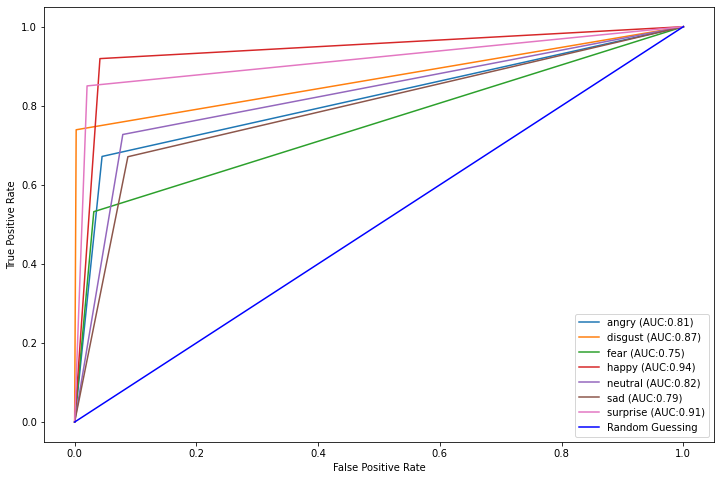

In [35]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['angry', 'disgust', 'fear', 'happy', 'neutral',
          'sad', 'surprise']
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average,multi_class='ovr')


print('ROC AUC score:', multiclass_roc_auc_score(ytrain, ypred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

ROC AUC score: 0.779739866673934


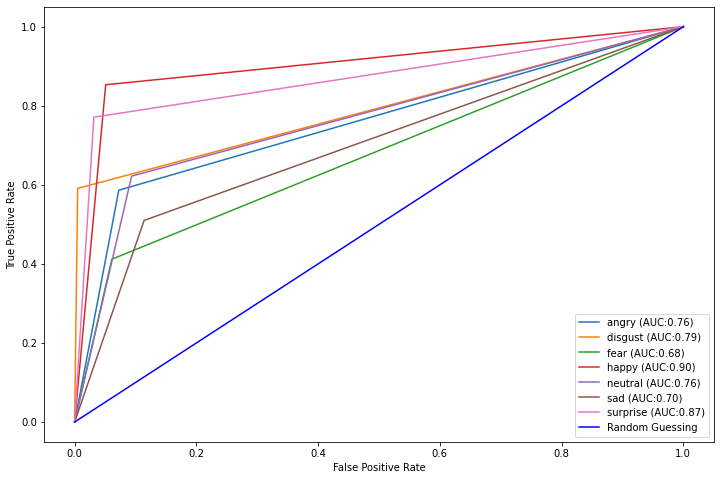

In [36]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(ytest, ypred_test))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint2 = ModelCheckpoint(
    'fer-53.h5', 
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    save_weights_only=False,
    mode='auto'
)

In [41]:
import scipy.special
import scipy

history = model.fit(x = train_generator,epochs = 2,batch_size=batch_size,validation_data = validation_generator,callbacks=[checkpoint2])

Epoch 1/2
359/359 [==============================] - ETA: 0s - loss: 0.7734 - accuracy: 0.7084
Epoch 1: val_accuracy improved from -inf to 0.62570, saving model to fer-53.h5
359/359 [==============================] - 385s 1s/step - loss: 0.7734 - accuracy: 0.7084 - val_loss: 1.1071 - val_accuracy: 0.6257
Epoch 2/2
359/359 [==============================] - ETA: 0s - loss: 0.7662 - accuracy: 0.7144
Epoch 2: val_accuracy did not improve from 0.62570
359/359 [==============================] - 386s 1s/step - loss: 0.7662 - accuracy: 0.7144 - val_loss: 1.0893 - val_accuracy: 0.6159


In [42]:
import scipy.special
import scipy

history = model.fit(x = train_generator,epochs = 50,batch_size=batch_size,validation_data = validation_generator,callbacks=[checkpoint2])

Epoch 1/50
359/359 [==============================] - ETA: 0s - loss: 0.7654 - accuracy: 0.7133
Epoch 1: val_accuracy improved from 0.62570 to 0.63897, saving model to fer-53.h5
359/359 [==============================] - 387s 1s/step - loss: 0.7654 - accuracy: 0.7133 - val_loss: 1.1953 - val_accuracy: 0.6390
Epoch 2/50
359/359 [==============================] - ETA: 0s - loss: 0.7587 - accuracy: 0.7161
Epoch 2: val_accuracy did not improve from 0.63897
359/359 [==============================] - 379s 1s/step - loss: 0.7587 - accuracy: 0.7161 - val_loss: 1.1421 - val_accuracy: 0.6159
Epoch 3/50
359/359 [==============================] - ETA: 0s - loss: 0.7456 - accuracy: 0.7227
Epoch 3: val_accuracy did not improve from 0.63897
359/359 [==============================] - 384s 1s/step - loss: 0.7456 - accuracy: 0.7227 - val_loss: 1.0992 - val_accuracy: 0.6194
Epoch 4/50
359/359 [==============================] - ETA: 0s - loss: 0.7449 - accuracy: 0.7218
Epoch 4: val_accuracy did not improv

359/359 [==============================] - ETA: 0s - loss: 0.5842 - accuracy: 0.7861
Epoch 30: val_accuracy did not improve from 0.63897
359/359 [==============================] - 1022s 3s/step - loss: 0.5842 - accuracy: 0.7861 - val_loss: 1.1876 - val_accuracy: 0.6369
Epoch 31/50
359/359 [==============================] - ETA: 0s - loss: 0.5685 - accuracy: 0.7918
Epoch 31: val_accuracy did not improve from 0.63897
359/359 [==============================] - 1023s 3s/step - loss: 0.5685 - accuracy: 0.7918 - val_loss: 1.1646 - val_accuracy: 0.6152
Epoch 32/50
359/359 [==============================] - ETA: 0s - loss: 0.5760 - accuracy: 0.7891
Epoch 32: val_accuracy did not improve from 0.63897
359/359 [==============================] - 1021s 3s/step - loss: 0.5760 - accuracy: 0.7891 - val_loss: 1.1974 - val_accuracy: 0.6271
Epoch 33/50
359/359 [==============================] - ETA: 0s - loss: 0.5880 - accuracy: 0.7795
Epoch 33: val_accuracy did not improve from 0.63897
359/359 [========